<a href="https://colab.research.google.com/github/he16946/Data_Labs/blob/master/Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fraud Data

In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import (cross_validate, cross_val_score, KFold,
                                      train_test_split, StratifiedKFold)
from sklearn.tree import DecisionTreeClassifier,  DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

## Downloading data

In [2]:
os.environ['KAGGLE_USERNAME'] = "ce889group3" # username from the json file

os.environ['KAGGLE_KEY'] = "f0ec34f29bf37cceb765b25f5a1bce2c" # key from the json file

! kaggle datasets download -d mlg-ulb/creditcardfraud

 86% 57.0M/66.0M [00:01<00:00, 30.1MB/s]
100% 66.0M/66.0M [00:01<00:00, 47.1MB/s]


In [0]:
! unzip -q "creditcardfraud.zip"

In [0]:
df = pd.read_csv("creditcard.csv")

In [5]:
print('Fraud', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('Not Fraud', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')

Fraud 0.17 % of the dataset
Not Fraud 99.83 % of the dataset


## Preprocessing

No columns need to be removed

In [0]:
norm = ((df - df.min())/(df.max()-df.min()))

## Cross-validation 

In [7]:
norm.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
features = list(norm.columns[0:30])
print(features)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [0]:
x = norm[features]
y = norm['Class']

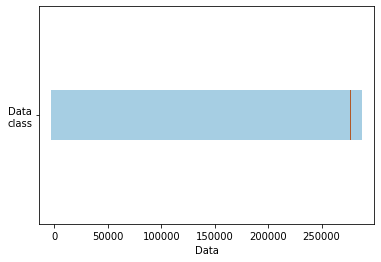

In [12]:
cmap_data = plt.cm.Paired
def visualize_classes(classes):
    fig, ax = plt.subplots()
    ax.scatter(range(len(classes)),  [3.5] * len(classes), c=classes, marker='_',
               lw=50, cmap=cmap_data)
    ax.set(yticks=[3.5],
           yticklabels=['Data\nclass'], xlabel="Data")


visualize_classes(y)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

**KFold Cross validation**

In [0]:
stnd = StandardScaler()
logit = LogisticRegression()
pipeline = make_pipeline(stnd, logit)
kf = KFold(n_splits = 10)

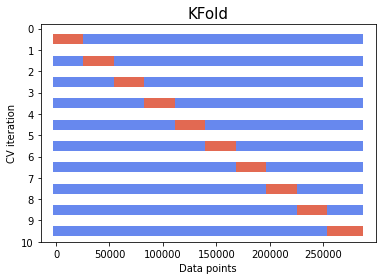

In [18]:
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    ax.set(yticks=np.arange(n_splits+2),
           xlabel='Data points', ylabel="CV iteration",
           ylim=[n_splits, -.2])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

fig, ax = plt.subplots()
plot_cv_indices(kf, x, y, ax, 10)

In [19]:
cv_results = cross_val_score(pipeline, x, y, cv=kf,scoring="accuracy", n_jobs=-1)
cv_results.mean()

0.9991467924703595

## Classifiers

**Dummy Classifier**

In [13]:
dummy = DummyClassifier(strategy='uniform', random_state=1)
dummy.fit(x_train, y_train)
dummy.score(x_test, y_test)  

0.5002247127889666

**Decision Tree**

In [14]:
dt = DecisionTreeClassifier(min_samples_split = 30, max_depth = 4, random_state = 32)
dt.fit(x_train, y_train)
print("DT score: ", dt.score(x_test, y_test))
print("Train score: ", cross_validate(dt, x_train, y_train)['test_score'].mean())
print("Test score: ", cross_validate(dt, x_test, y_test)['test_score'].mean())

DT score:  0.9994241734782731
Train score:  0.9993118138620349
Test score:  0.9992415947308334


Feature Importances 

> Only 7 features have non-zero importance

Feature ranking:
1. V17 (0.736503)
2. V10 (0.095296)
3. V14 (0.088127)
4. V27 (0.030293)
5. V26 (0.027593)
6. V21 (0.010449)
7. V3 (0.006780)
8. V12 (0.004958)
9. V4 (0.000000)
10. V5 (0.000000)
11. V6 (0.000000)
12. V7 (0.000000)
13. V2 (0.000000)
14. V8 (0.000000)
15. V9 (0.000000)
16. V1 (0.000000)
17. V11 (0.000000)
18. Amount (0.000000)
19. V13 (0.000000)
20. V28 (0.000000)
21. V15 (0.000000)
22. V16 (0.000000)
23. V18 (0.000000)
24. V19 (0.000000)
25. V20 (0.000000)
26. V22 (0.000000)
27. V23 (0.000000)
28. V24 (0.000000)
29. V25 (0.000000)
30. Time (0.000000)


(0.0, 0.7733280314371411)

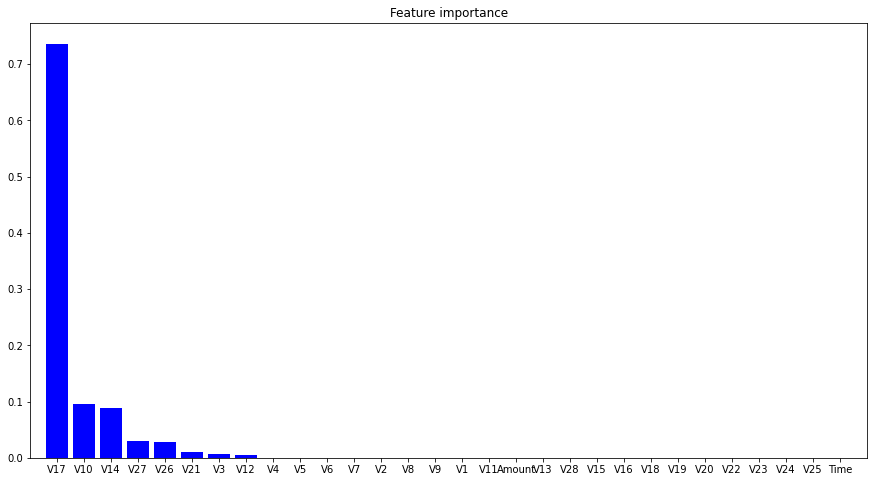

In [15]:
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(x.shape[1]):
  print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

fig = plt.figure()
plt.title("Feature importance")
plt.bar(range(x.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(x.shape[1]), np.array(features)[indices])
plt.xlim([-1, x.shape[1]])
fig.set_size_inches(15, 8)
axes = plt.gca()
axes.set_ylim([0, None])

**Random Tree**

In [16]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 4, random_state = 32)
rf.fit(x_train, y_train)
print("DT score: ", rf.score(x_test, y_test))
print("Train score: ", cross_validate(rf, x_train, y_train)['test_score'].mean())
print("Test score: ", cross_validate(rf, x_test, y_test)['test_score'].mean())

DT score:  0.9993820398303418
Train score:  0.9993445846305097
Test score:  0.9993118174774687


Feature importances

> All features have non-zero importance

Feature ranking:
1. V17 (0.226127)
2. V12 (0.165042)
3. V10 (0.122450)
4. V14 (0.116532)
5. V16 (0.080437)
6. V11 (0.077792)
7. V18 (0.030342)
8. V9 (0.028699)
9. V7 (0.028462)
10. V4 (0.026261)
11. V3 (0.011895)
12. V21 (0.011552)
13. V26 (0.009491)
14. V2 (0.008386)
15. V27 (0.008285)
16. V6 (0.008110)
17. V8 (0.005718)
18. V5 (0.005317)
19. V20 (0.004531)
20. V1 (0.004129)
21. V19 (0.003324)
22. V24 (0.003195)
23. V15 (0.003130)
24. V28 (0.002149)
25. V22 (0.001933)
26. Amount (0.001890)
27. Time (0.001780)
28. V23 (0.001203)
29. V25 (0.000957)
30. V13 (0.000883)


(0.0, 0.5645685419451831)

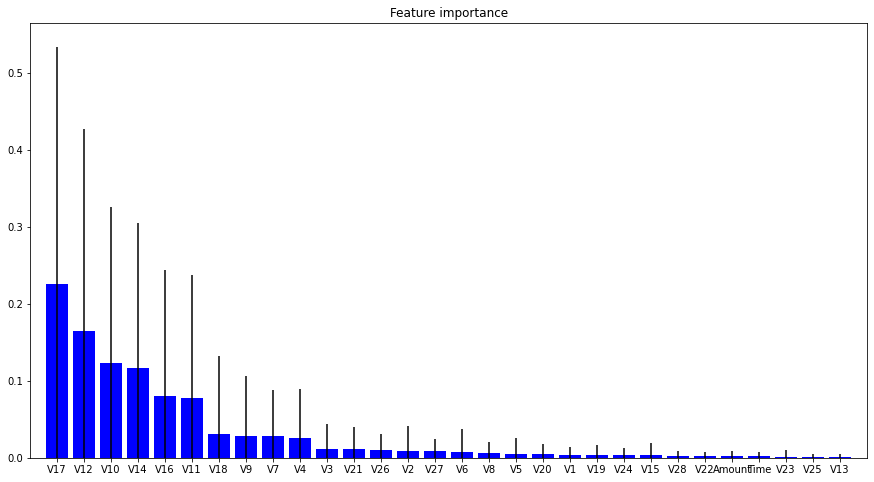

In [24]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(x.shape[1]):
  print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

fig = plt.figure()
plt.title("Feature importance")
plt.bar(range(x.shape[1]), importances[indices], color="b", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), np.array(features)[indices])
plt.xlim([-1, x.shape[1]])
fig.set_size_inches(15, 8)
axes = plt.gca()
axes.set_ylim([0, None])

**Decision Tree Regressor**

In [20]:
tr = DecisionTreeRegressor(random_state = 0, max_depth = 4, min_samples_split= 30)
tr.fit(x_train, y_train)
print("Test score: ", tr.score(x_test, y_test))
print("CrossVal score: ", cross_validate(tr, x_test, y_test, cv = 10)['test_score'].mean())

Test score:  0.6884789921708029
CrossVal score:  0.6193094683733845
